In [1]:
%load_ext lab_black
import pandas as pd
import json


f = open("histohour_BTC.json",)
data = json.load(f)
data = pd.DataFrame.from_dict(data["Data"]["Data"])
data = data[["time", "close"]]
f.close()
data

,time,close
0,1611691200,32020.72
1,1611694800,32024.18
2,1611698400,32765.79
3,1611702000,32516.52
4,1611705600,32371.54
...,...,...
1996,1618876800,54710.74
1997,1618880400,54854.55
1998,1618884000,54235.44
1999,1618887600,54602.38


In [2]:
def get_profit(lower_limit, upper_limit):
    i = 0
    profit = 0
    records = []
    n = 0
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if i % 2 == 0:
            if row["RSI"] <= lower_limit and n == 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                n += 1
                i += 1
        else:
            if row["RSI"] >= upper_limit and n >= 0 and profit + price >= 1:
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                n -= 1
                i += 1
    return profit


def calculation(data, window_length, lower_limit, upper_limit):
    delta = data["close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up <= 1] = 0
    down[down >= 2] = 0
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    data.loc[:, "RSI"] = RSI1
    data.loc[:, "TimeStamp"] = pd.to_datetime(data["time"], unit="s")
    data = data.set_index("TimeStamp")
    return get_profit(lower_limit, upper_limit)


calculation(data, 14, 50, 60)

-49882.219999999994

In [3]:
# %%time
# from tqdm import tqdm
# optimizations=[]
# for window_length in tqdm(range(10, 20)):
#     for lower_limit in range(10, 30):
#         for upper_limit in range(80, 100):
#             profit = calculation(data, window_length, lower_limit,upper_limit)
#             optimizations.append([profit, window_length, lower_limit, upper_limit])

In [4]:
# optimization_df = pd.DataFrame(
#     optimizations, columns=["Profit", "WindowLength", "LowerLimit", "UpperLimit"]
# )
# pd.set_option("max_rows", 30)
# optimization_df

In [5]:
# optimization_df[optimization_df["Profit"] == optimization_df["Profit"].max()]

In [6]:
window_length = 12
lower_limit = 21
upper_limit = 92

In [7]:
def get_profit(lower_limit, upper_limit):
    i = 0
    profit = 0
    records = []
    n = 0
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if i % 2 == 0:
            if row["RSI"] <= lower_limit and n == 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                n += 1
                i += 1
        else:
            if row["RSI"] >= upper_limit and n >= 0 and profit + price >= 1:
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                n -= 1
                i += 1
    return records, profit


def calculation(data, window_length, lower_limit, upper_limit):
    delta = data["close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up <= 1] = 0
    down[down >= 2] = 0
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    data.loc[:, "RSI"] = RSI1
    data.loc[:, "TimeStamp"] = pd.to_datetime(data["time"], unit="s")
    data = data.set_index("TimeStamp")
    records, profit = get_profit(lower_limit, upper_limit)
    return records, profit


records, profit = calculation(data, window_length, lower_limit, upper_limit)
formated_profit = f"{round(profit):,}"
print(f"Total profit: USD {formated_profit}\n")
records_df = pd.DataFrame(records, columns=["Action", "Price", "Profit", "Day"])
pd.set_option("max_rows", 30)
records_df

Total profit: USD -17,711



,Action,Price,Profit,Day
0,Buying,-30316,-30316,17
1,Selling,43234,12918,304
2,Buying,-45010,-32092,354
3,Selling,54781,22688,573
4,Buying,-53756,-31068,640
5,Selling,52565,21498,856
6,Buying,-47354,-25857,929
7,Selling,61611,35754,1104
8,Buying,-55855,-20101,1141
9,Selling,60983,40882,1760


In [8]:
# optimization_df.to_excel("Profit_Optimization_BTC_hr.xlsx")

In [9]:
data = data[["close", "TimeStamp"]]

<AxesSubplot:>

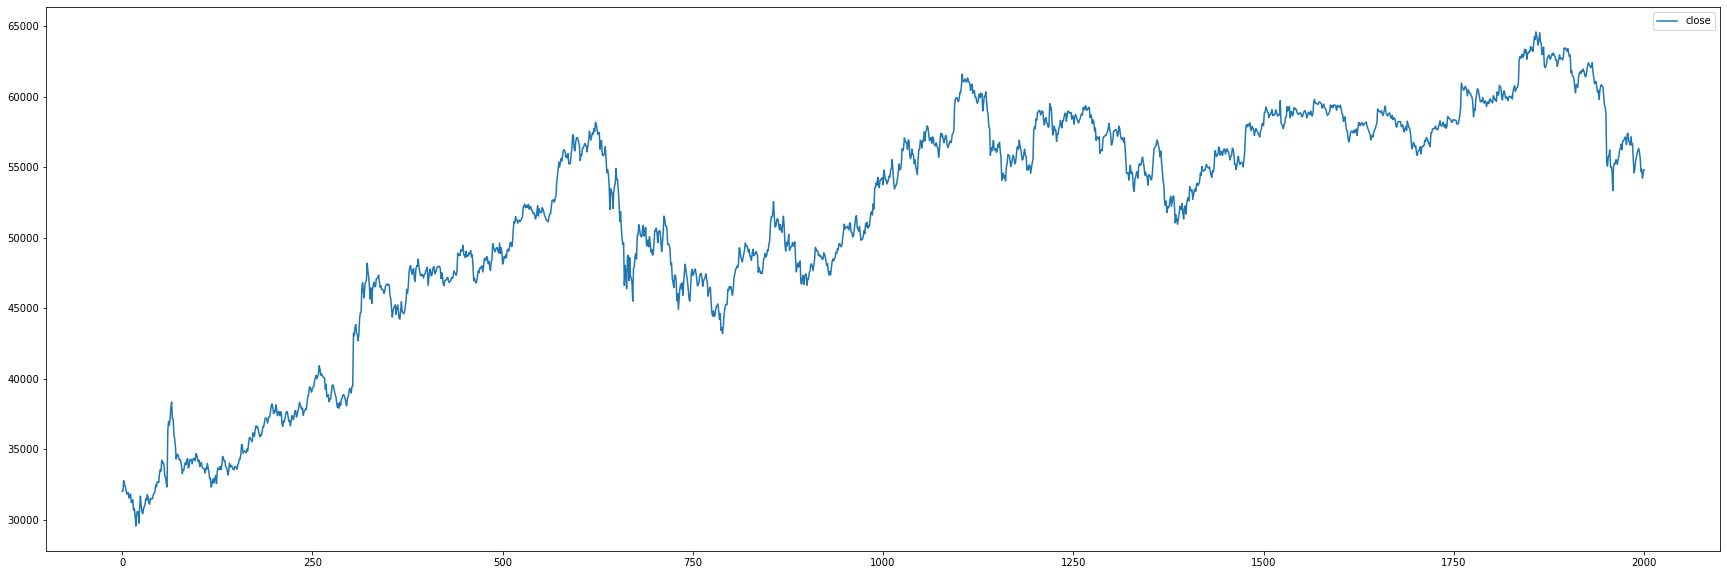

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(30, 10))
# plt.ylim(0, 100)
data[["close"]].plot(ax=ax)

In [11]:
lowest_price = 25000
r = 0.02
prices = [lowest_price * (1 + r) ** i for i in range(0, 50)]
# prices

In [12]:
data

,close,TimeStamp
0,32020.72,2021-01-26 20:00:00
1,32024.18,2021-01-26 21:00:00
2,32765.79,2021-01-26 22:00:00
3,32516.52,2021-01-26 23:00:00
4,32371.54,2021-01-27 00:00:00
...,...,...
1996,54710.74,2021-04-20 00:00:00
1997,54854.55,2021-04-20 01:00:00
1998,54235.44,2021-04-20 02:00:00
1999,54602.38,2021-04-20 03:00:00


多个网格的必要性

In [43]:
cash = 100000
profit = 0
records = []
n = 0
last_price = 0
lower_bound = 20000
upper_bound = 70000
r = 0.003
fee = 0.002
for index, row in data.iterrows():
    time = index
    price = row["close"]
    if lower_bound <= price <= upper_bound:
        if last_price == 0:
            last_price = price
        trading_buying_price = price * (1 + fee)
        trading_selling_price = price * (1 - fee)
        if n == 0 and price <= last_price * (1 - r) and cash - trading_buying_price > 0:
            n += cash // trading_buying_price
            cash -= trading_buying_price * n
            profit = cash - 100000
            records.append(
                ["Buying", -round(price), n, round(cash), round(profit), time]
            )
            last_price = price
        elif n > 0 and price >= last_price * (1 + r):
            cash += trading_selling_price * n
            profit = cash - 100000
            records.append(
                ["Selling", round(price), 0, round(cash), round(profit), time]
            )
            last_price = price
            n = 0

pd.set_option("display.max_rows", None, "display.max_columns", None)
records_df = pd.DataFrame(
    records, columns=["Action", "Price", "n", "Cash", "Profit", "Hour"]
)
print(records_df)

     Action  Price    n    Cash  Profit  Hour
0    Buying -31820  3.0    4349  -95651     6
1   Selling  31930  0.0   99947     -53     8
2    Buying -31544  3.0    5127  -94873     9
3   Selling  31716  0.0  100084      84    10
4    Buying -31212  3.0    6261  -93739    12
5   Selling  31414  0.0  100314     314    14
6    Buying -30683  3.0    8082  -91918    15
7   Selling  30795  0.0  100281     281    16
8    Buying -30316  3.0    9152  -90848    17
9   Selling  30597  0.0  100760     760    20
10   Buying -29753  3.0   11321  -88679    22
11  Selling  30799  0.0  103535    3535    23
12   Buying -30591  3.0   11577  -88423    26
13  Selling  30736  0.0  103600    3600    28


In [46]:
a = 30736 * (1 - 0.003)
a

30643.792

In [41]:
%%time
def get_profit(r):
    cash = 100000
    profit = 0
    records = []
    n = 0
    last_price = 0
    lower_bound = 50000
    upper_bound = 70000
    fee = 0.002
    for index, row in data.iterrows():
        time = index
        price = row["close"]
        if lower_bound <= price <= upper_bound:
            if last_price == 0:
                last_price = price
            trading_buying_price = price * (1 + fee)
            trading_selling_price = price * (1 - fee)
            if n == 0 and price <= last_price * (1 - r) and cash - trading_buying_price > 0:
                n += cash // trading_buying_price
                cash -= trading_buying_price * n
                profit = cash - 100000
                records.append(
                    ["Buying", -round(price), n, round(cash), round(profit), time]
                )
                last_price = price
            elif n > 0 and price >= last_price * (1 + r):
                cash += trading_selling_price * n
                profit = cash - 100000
                records.append(
                    ["Selling", round(price), 0, round(cash), round(profit), time]
                )
                last_price = price
                n = 0
    return profit


import numpy as np
from tqdm import tqdm
optimization_r=[]
for r in tqdm(np.arange(0.002,0.1,0.0001)):
    profit=get_profit(r)
    optimization_r.append([r, profit])
optimization_r_df = pd.DataFrame(optimization_r, columns=["Rate", "Profit"])
pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(optimization_r_df)
optimization_r_df[optimization_r_df["Profit"] == optimization_r_df["Profit"].max()]

100%|██████████| 980/980 [04:12<00:00,  3.88it/s]

Wall time: 4min 12s


,Rate,Profit
25,0.0045,10565.84878
26,0.0046,10565.84878
27,0.0047,10565.84878
28,0.0048,10565.84878


In [48]:
optimization_r_df[optimization_r_df["Profit"] == optimization_r_df["Profit"].max()]

,Rate,Profit
25,0.0045,10565.84878
26,0.0046,10565.84878
27,0.0047,10565.84878
28,0.0048,10565.84878
